In [19]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_full.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, :4]
y = iris[:, 4]

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)


# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)

X = X[inds]
y = y[inds]

In [20]:
print(X[:5])
print(y[:5])

[[1.  4.5 2.3 1.3 0.3]
 [1.  4.9 3.1 1.5 0.1]
 [1.  5.5 2.3 4.  1.3]
 [1.  4.7 3.2 1.3 0.2]
 [1.  5.  3.4 1.6 0.4]]
[0. 0. 1. 0. 0.]


In [23]:
def tanh_function(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

def loss_function(y_hat, y):
    h_scale = (y_hat + 1)/2
    return (-y * np.log(h_scale) - (1 - y) * np.log(1 - h_scale)).mean()

def predict(X, theta):    
    y_hat = tanh_function(np.dot(X, theta))
    return y_hat

def compute_gradient(X, y_hat, y):
    return np.dot(X.T, (y_hat-y)*(1+y_hat)/y_hat) / y.size

In [24]:
lr=0.01
num_iter=200

theta = np.array([0.1, 0.5, 0.1, 0.5, -0.1])
losses = []
accs   = []

for i in range(num_iter):
    # predict output
    y_hat = predict(X, theta)
    
    # compute loss
    loss = loss_function(y_hat, y)

    # compute mean of gradient
    gradient = compute_gradient(X, y_hat, y)
    
    # update 
    theta -= lr*gradient    

    # for debug
    #if(i%1 == 0):
    # loss
    losses.append(loss)

    # accuracy for training
    preds = predict(X, theta).round()/2 + 0.5
    acc = (preds == y).mean()
    accs.append(acc)        


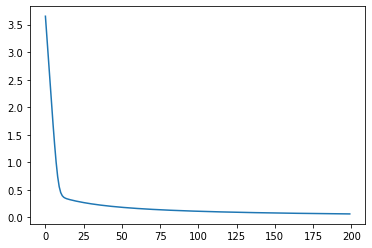

In [25]:
# show figures
plt.plot(losses)
plt.show()

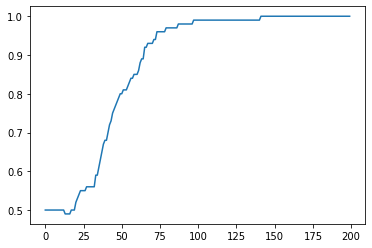

In [26]:
plt.plot(accs)
plt.show()

In [ ]:
# ham tanh hoi tu cham hon

In [27]:
preds = predict(X, theta).round()/2 + 0.5
print(preds)
print(y)

[0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 0.]
[0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 0.]
